In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

In [4]:
from sklearn.datasets import fetch_california_housing

california = fetch_california_housing()

In [6]:
from sklearn.datasets import fetch_california_housing
data = fetch_california_housing(as_frame=True)
df = data.frame
df.head()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,MedHouseVal
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23,4.526
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22,3.585
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24,3.521
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25,3.413
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25,3.422


In [8]:
print(df.isnull().sum())

MedInc         0
HouseAge       0
AveRooms       0
AveBedrms      0
Population     0
AveOccup       0
Latitude       0
Longitude      0
MedHouseVal    0
dtype: int64


In [12]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(california.data,
                                                    california.target, random_state=11)
print(X_train.shape)
print(X_test.shape)

(15480, 8)
(5160, 8)


In [14]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_squared_error
import numpy as np

tree = DecisionTreeRegressor(max_depth=10)
tree.fit(X_train, y_train)

mse = mean_squared_error(y_test, tree.predict(X_test))
rmse = np.sqrt(mse)

print("Tree RMSE:", rmse)


Tree RMSE: 0.6560463133107153


In [16]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error
import numpy as np

rf = RandomForestRegressor(n_estimators=100)
rf.fit(X_train, y_train)

mse = mean_squared_error(y_test, rf.predict(X_test))
rmse = np.sqrt(mse)

print("RF RMSE:", rmse)


RF RMSE: 0.5140314157668767


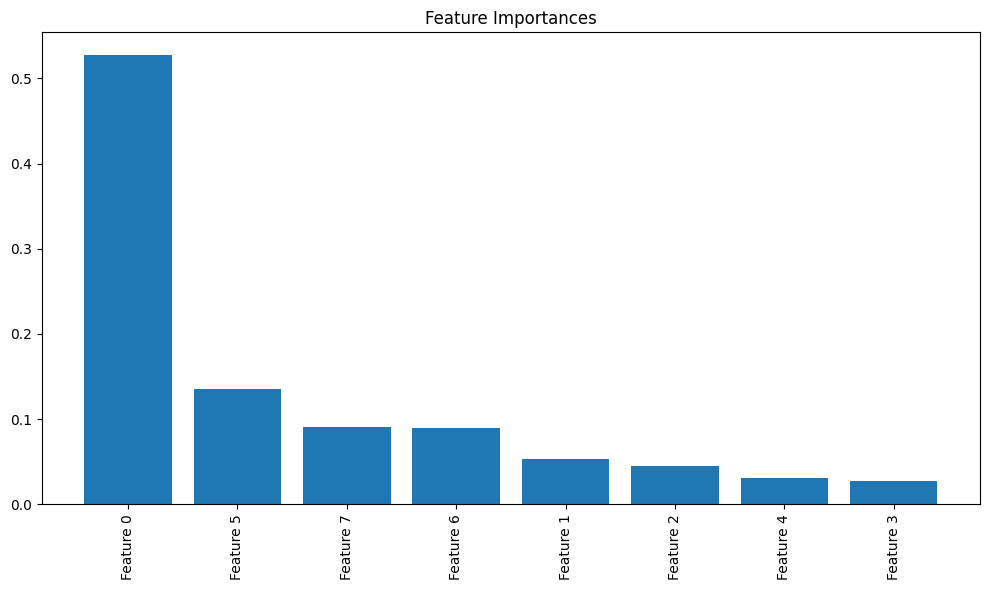

In [18]:
import matplotlib.pyplot as plt
import numpy as np

importances = rf.feature_importances_
indices = np.argsort(importances)[::-1]

rf.fit(X_train, y_train)   # here X_train should be a DataFrame

plt.figure(figsize=(10,6))
plt.title("Feature Importances")
plt.bar(range(X_train.shape[1]), importances[indices])
plt.xticks(range(X_train.shape[1]), [f"Feature {i}" for i in indices], rotation=90)
plt.tight_layout()
plt.show()
